# Linear Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import scipy as sp

In [39]:
LeaderBoard = pd.read_csv('LeaderBoard_Data.csv')
Season_Stats = pd.read_csv('SeasonStats_Data.csv')
Filt = ['Points','Previous_Years_Points','Climbing','General_Classification',
        'Time_Trial','Sprinting','One_Day_Races', 'Course_Profile']

Features = LeaderBoard[Filt]

In [40]:
Flat_filt = (Features['Course_Profile'] < 60)
Average_filt = (Features['Course_Profile'] >= 60) & (Features['Course_Profile'] < 110)
Hilly_filt = (Features['Course_Profile'] >= 110)

Flat_Races = Features[Flat_filt]
Average_Races = Features[Average_filt]
Hilly_Races = Features[Hilly_filt]

In [42]:
Flat_Races.to_csv(r'C:\\Users\\User\\Documents\\DataScience_Projects\Flat_Races.csv', index = False, header=True)
Average_Races.to_csv(r'C:\\Users\\User\\Documents\\DataScience_Projects\Average_Races.csv', index = False, header=True)
Hilly_Races.to_csv(r'C:\\Users\\User\\Documents\\DataScience_Projects\Hilly_Races.csv', index = False, header=True)

In [27]:
for i in Flat_Races:
    print(Flat_Races[i].skew())

5.973028025300204
3.150953977827969
5.169550654166291
3.7341430128890227
5.028167484303535
3.18561170043733
3.359443037352462


<AxesSubplot:>

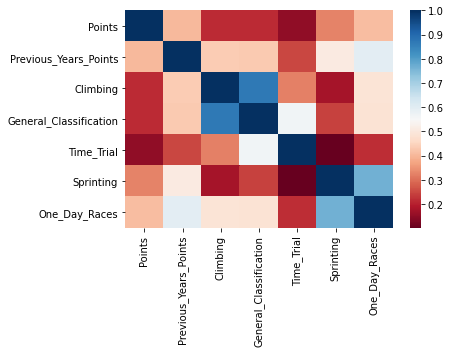

In [4]:
corr = Flat_Races.corr()

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [34]:
# sns.pairplot(Features)

In [36]:
X = Flat_Races.drop('Points', axis = 1)
Y = Flat_Races['Points']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# 'add_constant' so that it also fits an intercept
X_with_constant = sm.add_constant(X_train)

In [37]:
X_with_constant = sm.add_constant(X)
def get_stats():
    results = sm.OLS(Y, X_with_constant).fit()
    print(results.summary())
get_stats()

                            OLS Regression Results                            
Dep. Variable:                 Points   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     694.0
Date:                Tue, 23 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:41:19   Log-Likelihood:                -70576.
No. Observations:               15374   AIC:                         1.412e+05
Df Residuals:                   15367   BIC:                         1.412e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [29]:
del X_with_constant["Climbing"]
get_stats()

                            OLS Regression Results                            
Dep. Variable:                 Points   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     832.7
Date:                Tue, 23 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:35:47   Log-Likelihood:                -70576.
No. Observations:               15374   AIC:                         1.412e+05
Df Residuals:                   15368   BIC:                         1.412e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [30]:
del X_with_constant["Sprinting"]
get_stats()

                            OLS Regression Results                            
Dep. Variable:                 Points   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     1041.
Date:                Tue, 23 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:35:49   Log-Likelihood:                -70577.
No. Observations:               15374   AIC:                         1.412e+05
Df Residuals:                   15369   BIC:                         1.412e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0